## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **Tuesday, 17th January 2022 at 11:59 pm**. 

6. There is a **bonus** question worth 5 points.

7. **Five points are for properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (1 pt); *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
- No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g., printouts of the working directory should not be included in the final submission  (1 pt).
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt).
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt).

8.  The maximum possible score in the assigment is 95 + 5 (formatting) + 5 (bonus question) = 105 out of 100. There is no partial credit for the bonus question.

## Regression vs Classification; Prediction vs Inference

Explain (1) whether each scenario is a classification or regression problem, and (2) whether we are most interested in inference or prediction. Answers to both parts must be supported by a justification.

### 
Consider a company that is interested in conducting a marketing campaign. The goal is to identify individuals who are likely to respond positively to a marketing campaign, based on observations of demographic variables *(such as age, gender, income, etc.)* measured on each individual. 

*(2+2 points)*

This is a classification problem because the objective is to sort individuals into two "classes" or categories: individuals who are likely to respond positively and individuals who are not. This is a prediction problem because the focus is solely on identifying which people respond positively and not on how the demographic variables or other factors impact their response. 

### 
Consider that the company mentioned in the previous question is interested in understanding the impact of advertising promotions in different media types on the company sales. For example, the company is interested in the question, *'how large of an increase in sales is associated with a given increase in radio vis-a-vis TV advertising?'*

*(2+2 points)*

This is a regression problem because the response variable (company sales) is a continuous variable. We are most interested in inference because the question cares about identifying the relationship between predictors (radio and TV advertising) and the response variable.

### 
Consider a company selling furniture is interested in the finding the association between demographic characterisitcs of customers (such as age, gender, income, etc.) and their probability of purchase of a particular company product.

*(2+2 points)*

This is a classification problem because the response variable is a customer's probability of purchase (whether they will buy the product or not buy the product) so it is categorical. We care about inference in this problem because the company wants to find the association between predictors (demographic characteristics) and the response variable.

### 
We are interested in predicting the % change in the USD/Euro exchange rate in relation to the weekly changes in the world
stock markets. Hence we collect weekly data for all of 2022. For each week we record the % change in the USD/Euro, the %
change in the US market, the % change in the British market, and the % change in the German market.

*(2+2 points)*

This is a regression problem because the response variable, % change in the USD/Euro exchange rate, is continuous. It is also an inference problem because it cares about how the response variable changes based on the predictors (weekly changes in the world stock markets).

## RMSE vs MAE

### 
Describe a regression problem, where it will be more appropriate to assess the model accuracy using the root mean squared error (RMSE) metric as compared to the mean absolute error (MAE) metric.

**Note:** Don't use the examples presented in class

*(4 points)*

One situation where it is more appropriate to use RMSE than MAE to assess model accuracy is when predicting the length (time) of your commute based on variables like time of day and mode of transportation. RMSE is more appropriate because in this scenario you would want to penalize large errors more than smaller errors. You would want your model to reflect how being 30 minutes late is a lot worse than being 5 or 10 minutes late.

### 
Describe a regression problem, where it will be more appropriate to assess the model accuracy using the mean absolute error (MAE) metric as compared to the root mean squared error (RMSE) metric.

**Note:** Don't use the examples presented in class

*(4 points)*

One situation where it is more appropriate to use MAE than RMSE is when predicting the number of defective car parts a factory will produce based on variables like machine age and calendar month. MAE is more appropriate because in this scenario the factory would want to minimize overall errors rather than large errors.

## FNR vs FPR

### 
A classification model is developed to predict those customers who will respond positively to a company's tele-marketing campaign. All those customers that are predicted to respond positively to the campaign will be called by phone to buy the product being marketed. If the customer being called purchases the product ($y = 1$), the company will get a profit of \$100. On the other hand, if they are called and they don't purchase ($y = 0$), the company will have a loss of \$1. Among FPR (False positive rate) and FNR (False negative rate), which metric is more important to be minimized to reduce the loss associated with misclassification? Justify your answer. 

In your justification, you must clearly interpret False Negatives (FN) and False Postives (FP) first.

**Assumption:** Assume that based on the past marketing campaigns, around 50% of the customers will actually respond positively to the campaign.

*(4 points)*

It is more important to minimize FPR to reduce the loss associated with misclassification. In the scenario, a false positive would consist of predicting that a customer will respond positively to a campaign when in reality they do not respond positively. A false negative would consist of predicting that a customer would not respond positively when in reality they would (you miss out on a potential purchase). It is important to minimize FPR because false positives guarantee a loss of $1 since these customers don't actually respond positively to the campaign and are therefore not likely to purchase. Meanwhile, true positives at least have some likelihood of purchasing the product being marketed because they do respond positively to the campaign.

### 
Can the answer to the previous question change if the assumption stated in the question is false? Justify your answer.

*(6 points)*

If the assumption is false and a lot less than 50% of customers actually respond positively, it could be more important to minimize FNR because at that point, there are so few customers who actually care about the product that you cannot afford to miss calling a customer who actually could be interested. 

## Petrol consumption

Read the dataset *petrol_consumption_train.csv*. It contains the following five columns: 

`Petrol_tax`: Petrol tax (cents per gallon) 

`Per_capita_income`: Average income (dollars) 

`Paved_highways`: Paved Highways (miles) 

`Prop_license`: Proportion of population with driver's licenses 

`Petrol_consumption`: Consumption of petrol (millions of gallons)

In [3]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

#reading in data and printing head
petrol = pd.read_csv('petrol_consumption_train.csv')
petrol.head()

,Petrol_tax,Per_capita_income,Paved_highways,Prop_license,Petrol_consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### 
Make a pairwise plot of all the variables in the dataset. Which variable seems to have the highest linear correlation with `Petrol_consumption`? Let this variable be predictor *P*. *Note: If you cannot figure out P by looking at the visualization, you may find the pairwise linear correlation coefficient to identify P.*

*(4 points)*

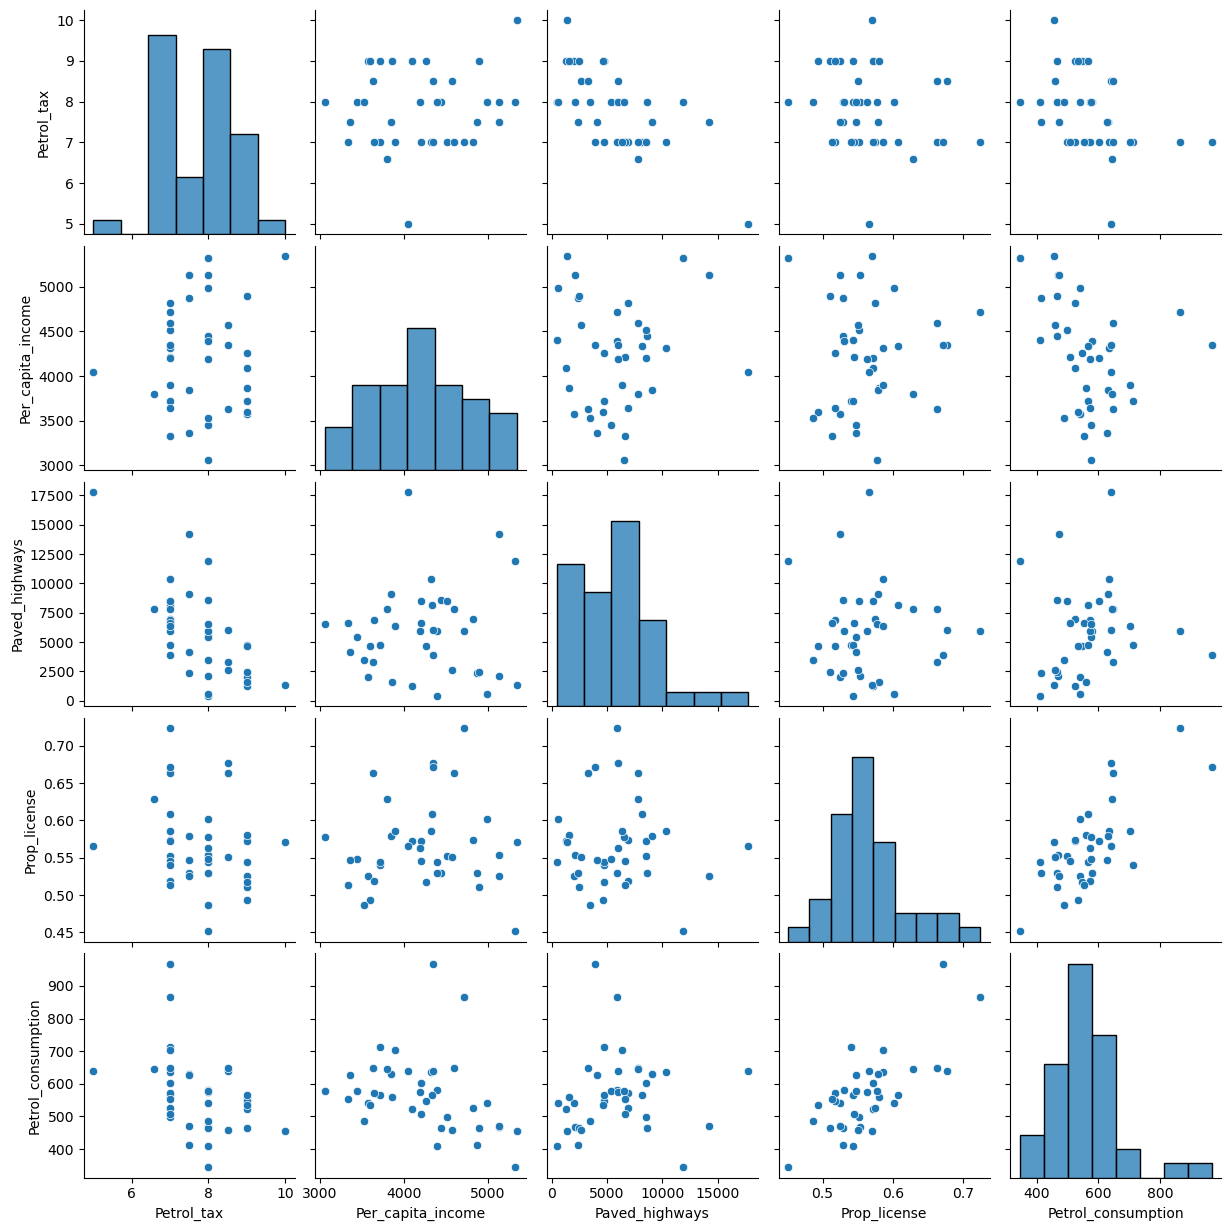

In [4]:
#creating pairwise plot
sns.pairplot(data = petrol)

In [5]:
#verifying correlation
petrol.corr()

,Petrol_tax,Per_capita_income,Paved_highways,Prop_license,Petrol_consumption
Petrol_tax,1.000000,0.082359,-0.660022,-0.223920,-0.393415
Per_capita_income,0.082359,1.000000,0.040256,0.048153,-0.314039
Paved_highways,-0.660022,0.040256,1.000000,-0.037998,0.098117
Prop_license,-0.223920,0.048153,-0.037998,1.000000,0.718303
Petrol_consumption,-0.393415,-0.314039,0.098117,0.718303,1.000000


Prop_license has the highest linear correlation with Petrol_consumption.

### 
Fit a simple linear regression model to predict `Petrol_consumption` based on predictor *P* (identified in the previous part). Print the model summary.

*(4 points)*

In [6]:
#creating ols object
ols_object = smf.ols(formula = 'Petrol_consumption~Prop_license', data = petrol)

#fitting model over data
model = ols_object.fit()

#printing model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_consumption   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     40.51
Date:                Thu, 19 Jan 2023   Prob (F-statistic):           1.80e-07
Time:                        17:44:10   Log-Likelihood:                -231.59
No. Observations:                  40   AIC:                             467.2
Df Residuals:                      38   BIC:                             470.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -267.6155    132.038     -2.027      0.050    -534.912      -0.319
Prop_license  1479.1803    232.414      6.364      0.000    1008.682    1949.678
==============================================================================
Omnibus:                        5.963   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                4.620
Skew:                           0.762   Prob(JB):                       0.0993
Kurtosis:                       3.670   Cond. No.                         23.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 
Interpret the coefficient of `Prop_license`. What is the increase in petrol consumption for an increase of 0.05 in *P*?

*(2+2 points)*

In [7]:
#printing petrol consumption for an increase of 0.05 in P
print(1479.1803*0.05)

73.95901500000001


The coefficient of Prop_license is 1479.1803. This means that for every additional unit of Prop_license, Petrol_consumption increases by 1479.1803 million gallons. Therefore, the increase in petrol consumption for an increase of 0.05 in Prop_license is about 73.95 million gallons.

### 
Does petrol consumption have a statistically significant relationship with the predictor *P*? Justify your answer.

*(4 points)*

Given that the p-value of Prop_license is less than 0.05 (it is listed as 0.000), Prop_license has a statistically significant relationship with petrol consumption. 

### 
What is the R-squared? Interpret its value.

*(4 points)*

The R-squared is 0.516, meaning that 51.6% of the variation in petrol consumption can be explained by the relationship between the proportion of the population with a driver's license and petrol consumption.

### 
Use the model developed above to estimate the petrol consumption for a state in which 50% of the population has a driver’s license. What are the confidence and prediction intervals for your estimate? Which interval includes the irreducible error?

*(4+3+3+2 = 12 points)*

In [8]:
#creating new dataframe for state with 50% prop_license
data = [[0.5]]
predict_consumption = pd.DataFrame(data = data, columns = ['Prop_license'])

#creating intervals for estimateed petrol consumtion and printing
intervals = model.get_prediction(predict_consumption)
intervals.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,471.974627,19.896237,431.6968,512.252454,302.822725,641.126528


A state in which 50% of the population has a drivers license consumes an estimated 471.97 million gallons of petrol according to the model above. The 95% confidence interval is about [431.69,512.25] and the 95% prediction interval is about [302.82,641.12]. The prediction interval includes the irreducible error.

### 
Use the model developed above to estimate the petrol consumption for a state in which 10% of the population has a driver’s license. Are you getting a reasonable estimate? Why or why not?

*(5 points)*

In [9]:
#creating new dataframe for state with 10% prop_license
data_10 = [[0.1]]
predict_consumption_10 = pd.DataFrame(data = data_10, columns = ['Prop_license'])

#creating intervals for estimateed petrol consumtion and printing
intervals_10 = model.get_prediction(predict_consumption_10)
intervals_10.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-119.697506,108.929769,-340.214295,100.819283,-394.684264,155.289251


According to the model, a state in which 10% of the population has a drivers license consumes an estimated -119.69 million gallons of petrol. This is an unreasonable estimate because it is impossible to have negative petrol consumption.

### 
What is the residual standard error of the model?

*(4 points)*

In [10]:
#calculating model's residual standard error
np.sqrt(model.mse_resid)

81.15342760294634

The residual standard error of the model is approximately 81.15.

### 
Using the model developed above, predict the petrol consumption for the observations in *petrol_consumption_test.csv*. Find the RMSE (Root mean squared error). Include the units of RMSE in your answer.

*(5 points)*

In [11]:
#reading in data
petrol_test = pd.read_csv('petrol_consumption_test.csv')

#saving petrol consumption observations for petrol_test
petrol_test_predict = model.predict(petrol_test)

#calculating RMSE
np.sqrt(((petrol_test.Petrol_consumption - petrol_test_predict)**2).mean())

80.13903941152401

The RMSE is approximately 80.13 million gallons

### 
Based on the answers to the previous two questions, do you think the model is overfitting? Justify your answer.

*(4 points)*

The residual standard error on the training data and the RMSE on the test data are pretty close which implies that the model is not overfitting because the model performs similarly on known and unknown data.

Make a scatterplot of `Petrol_consumption` vs `Prop_license` using *petrol_consumption_test.csv*. Over the scatterplot, plot the regression line, the prediction interval, and the confidence interval. Distinguish the regression line, prediction interval lines, and confidence interval lines with the following colors. Include the legend as well.

- Regression line: red
- Confidence interval lines: blue
- Prediction interval lines: green

*(4 points)*

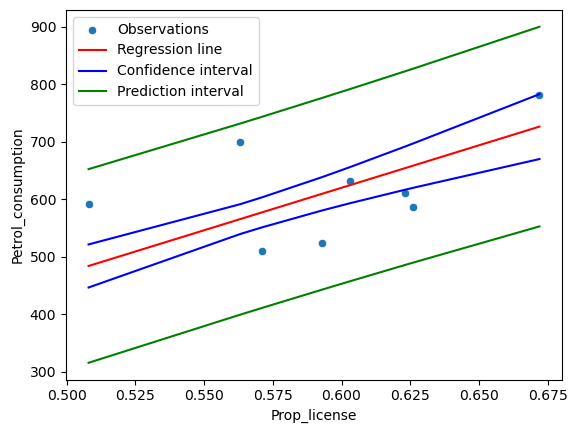

In [27]:
#calculating intervals
intervals_test = model.get_prediction(petrol_test)
interval_table = intervals_test.summary_frame(alpha=0.05)

#creating scatterplot
sns.scatterplot(data = petrol_test, x = 'Prop_license', y = 'Petrol_consumption')
sns.lineplot(x = petrol_test.Prop_license, y = petrol_test_predict, color = 'red', errorbar = None)
sns.lineplot(x = petrol_test.Prop_license, y = interval_table.mean_ci_lower, color = 'blue', errorbar = None)
sns.lineplot(x = petrol_test.Prop_license, y = interval_table.mean_ci_upper, color = 'blue',label='_nolegend_', errorbar = None)
sns.lineplot(x = petrol_test.Prop_license, y = interval_table.obs_ci_lower, color = 'green', errorbar = None)
sns.lineplot(x = petrol_test.Prop_license, y = interval_table.obs_ci_upper, color = 'green', errorbar = None)
plt.legend(labels=["Observations","Regression line","Confidence interval", "Prediction interval"])

Among the confidence and prediction intervals, which interval is wider, and why?

*(1+2 points)*

Prediction intervals are wider because they account for irreducible error in addition to reducible error while confidence intervals only take into account reducible error. In other words, prediction intervals must consider variation among individual observations while also accounting for not knowing the true population mean. Confidence intervals only have to account for uncertainty around the true mean. 

### 
Find the correlation between `Petrol_consumption` and the rest of the variables in *petrol_consumption_train.csv*. Based on the correlations, a simple linear regression model with which predictor will have the least R-squared value for predicting `Petrol_consumption`. Don't develop any linear regression models.

*(4 points)*

In [34]:
petrol.corrwith(petrol['Petrol_consumption'])

Petrol_tax           -0.393415
Per_capita_income    -0.314039
Paved_highways        0.098117
Prop_license          0.718303
Petrol_consumption    1.000000
dtype: float64

The predictor Paved_highways will have the least R-squared value for predicting Petrol_consumption. This is because the low correlation between Paved_highways and Petrol_consumption suggests a weak relationship between the variables, meaning that RMSE would be low because not much of the variation in Petrol_consumption could be attributed to this weak relationship.

**Bonus point question**

*(5 points - no partial credit)*

### 
Fit a simple linear regression model to predict `Petrol_consumption` based on predictor *P*, but without an intercept term.

*(you must answer this correctly to qualify for earning bonus points)*

### 
Estimate the petrol consumption for the observations in *petrol_consumption_test.csv* using the model in developed in the previous question. Find the RMSE.

*(you must answer this correctly to qualify for earning bonus points)*

### 
The RMSE for the models with and without the intercept are similar, which indicates that both models are almost equally good. However, the R-squared for the model without intercept is much higher than the R-squared for the model with the intercept. Why? Justify your answer.

*(5 points)*